# Homework set 3 -- Advanced Calculus

In [2]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

## Exercise 2b

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.


(3, 100)
<class 'numpy.ndarray'>


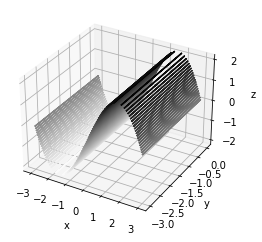

In [24]:
def surf_2b(u:float, v:float) -> np.ndarray:
    """
    Plot the surface of ex 2b using the given (u, v) parametrization.
    """
    assert np.all(0 <= v) and np.all(v <= np.pi)
    
    u_multipliers = np.array([
        [1],
        [np.cos(v)],
        [2 * np.sin(v)]
    ])

    return u * u_multipliers

def plot_2b_as_given():
    u = np.linspace(-3, 3, 100)
    v = np.linspace(0, np.pi, 100)
    points = surf_2b(u, v)
    print(points.shape)
    x = points[0, :]
    y = points[1, :]
    z = points[2, :]

    x = u
    y = np.cos(v) * u
    z = 2* np.sin(v) * u

    print(type(z))
    X, Y = np.meshgrid(x, y)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    Z = np.ones_like(X) * z
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z');


plot_2b_as_given()